In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as stats
%matplotlib inline

In [5]:
def calc_revenue(n_clients, price, n_sessions, commission ):
    """Calculates the revenue per year for a category
    n_clients - number of client users (uses number of clients as opposed to fraction of population
    price - price per visit or session
    n_sessions - number of sessions i.e. appointments
    commission - commission charged per transaction (between 0.03 - 0.06)"""
    ave_spend_year = n_sessions * price # average spent in a year
    business_captured = ave_spend_year * n_clients
    revenue_year = business_captured * commission
    return(revenue_year)

# Test case from spreadsheet should result in 444000
n_clients = 1480000 * 0.1
spend_per_visit = 20
n_visits0 = 6
commission0 = 0.025
print(calc_revenue(n_clients,spend_per_visit, n_visits0, commission0))

444000.0


In [4]:
def plot_sim_res(sim_res0, xlabel, title):
    h = sorted(sim_res0)
    fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
    tmp = plt.plot(h,fit,'-')
    tmp = plt.hist(h,bins = 50, density=True)      #use this to draw histogram of your data
    plt.xlabel(xlabel)
    plt.title(title)

In [32]:
def sim_category(price, n_visits, n_users, commission):
    """Simulates a single category of service over a year
    price - price per session
    n_visit - number of visits per year
    n_users - number of client users
    commission - commission charged per transaction (between 0.03 - 0.06)
    requires on calc_revenue()
    """
    n_simulations = 10000 # number of samples to generate
    var_matrix = np.array([n_users, price, n_visits])
    var_samples0 = [] # array to store all the list of samples of variables
    for i in var_matrix:
        var_samples0.append(np.random.default_rng().triangular(i[0], i[1], i[2], n_simulations))
    
    sim_res0 = [] # store the result of a single simulation
    for i in range(0, len(var_samples0[0])): # n_simulation == len(var_samples[0])
        res0 = calc_revenue(var_samples0[0][i], var_samples0[1][i], var_samples0[2][i], commission )
        sim_res0.append(res0)
    return sim_res0

# all monte carlo modelled values have a minimum, mode and maximum estimate
# average spend for appointment; monte carlo modelling of class
haircut = [54, 77, 99] # minimum, mode, maximum cost per appointment
n_visits = [3, 6, 10] # model number of visits a year
n_users = [10000, 15000, 17500] # number of transacting users
commission = 0.06 # commission charged 0.05 means 5% of transaction cost

revenue0 = sim_category(haircut, n_visits, n_users, commission)
# plot_sim_res(revenue0, 'Amount in EUR', 'Distribution of Revenue from Haircuts')

In [30]:
# model assumptions
# capture 0.1% of the population in Munich as an example
p0 = 1480000
frac_min = 0.0005 ; frac_mode = 0.001; frac_max = 0.002
n_users = [p0 * frac_min, p0 * frac_mode, p0 * frac_max]
n_users

[740.0, 1480.0, 2960.0]

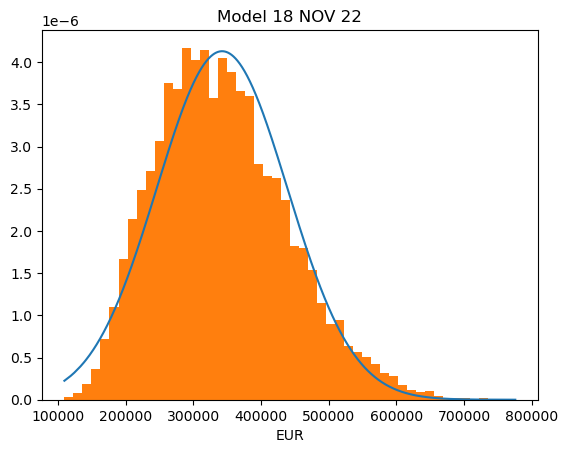

In [107]:
# Single cell sim for hair
hair = [53, 77, 99] # from the google sheet modelling - Appointment Costs
n_visits = [3, 6, 10] # model number of visits a year
commission = 0.05 # commission charged 0.05 means 5% of transaction cost

revenue_hair = sim_category(hair, n_visits, n_users, commission)
summary_revenue_hair = [round(min(revenue_hair)), round(stats.describe(revenue_hair)[2]),
                        round(max(revenue_hair))]
plot_sim_res(revenue_hair, 'EUR', 'Model 18 NOV 22')

### Estimate Marketing Costs

In [61]:
acq_client_cost = 2 # customer aquisition cost - percustomer?
acq_client_list = np.multiply(n_users, acq_client_cost)
print('Range of client acquisition cost', acq_client_list) # client acquisition cost list

#how many buisnesses do i need? to get service customers above to hit the numbers?
# Ratio of professionals to clients 1 : 160
# number of professionals required to serve
ratio_clients_professionals = 160
n_professional = np.multiply(n_users, (1/ratio_clients_professionals))
acq_professional_cost = 50 # business aquisition cost - perbusiness?
acq_professional_list = np.multiply(n_professionals, acq_professional_cost)
acq_professional_list
print('Range of professional acquisition cost', acq_professional_list)

total_acq_cost = acq_client_list + acq_professional_list
print('Client & Professional acquisition cost', total_acq_cost)

Range of client acquisition cost [20000 30000 35000]
Range of professional acquisition cost [3125.   4687.5  5468.75]
Client & Professional acquisition cost [23125.   34687.5  40468.75]


In [114]:
task = ['min', 'mean', 'max']
n_clients = n_users
df = pd.DataFrame()
df['Range'] = task
df['# Clients'] = n_clients
df['# Professionals'] = [round(x) for x in n_professionals] 
df['Acquisition Cost'] = [round(x) for x in total_acq_cost]
df['Hair'] = summary_revenue_hair
df['Rev to Acq Ratio'] = np.round(summary_revenue_hair / total_acq_cost)
df

Range  # Clients  # Professionals  Acquisition Cost    Hair  \
0   min      10000               62             23125  109357   
1  mean      15000               94             34688  342398   
2   max      17500              109             40469  775769   

   Rev to Acq Ratio  
0               5.0  
1              10.0  
2              19.0

In [111]:
summary_revenue_hair / total_acq_cost

array([ 4.72895135,  9.87093333, 19.16958147])